# Suppliers
In this notebook I am going to explore different metrics about our suppliers over different dimensions.
This will help me see the information from different angles and gain insight.
The main metrics are: Customer Ratings and Volume of Business.

## Import the libraries that are needed

In [201]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #'all' / 'last'

## Load the Datasets and perform some basic formatting

In [202]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])

## Different Plots

   index            supplier  count
0     10        Marconni LLC  13075
1      0         BowTie Corp  11030
2     14         Trusty Limo   9670
3      1           Brother_2   9664
4     15        Vargas Trips   6302
5      4           El Master   5490
6     13          Super Vans   3673
7      9  LES Radio Dispatch   1098


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Marconni LLC'),
  Text(1, 0, 'BowTie Corp'),
  Text(2, 0, 'Trusty Limo'),
  Text(3, 0, 'Brother_2'),
  Text(4, 0, 'Vargas Trips'),
  Text(5, 0, 'El Master'),
  Text(6, 0, 'Super Vans'),
  Text(7, 0, 'LES Radio Dispatch')])

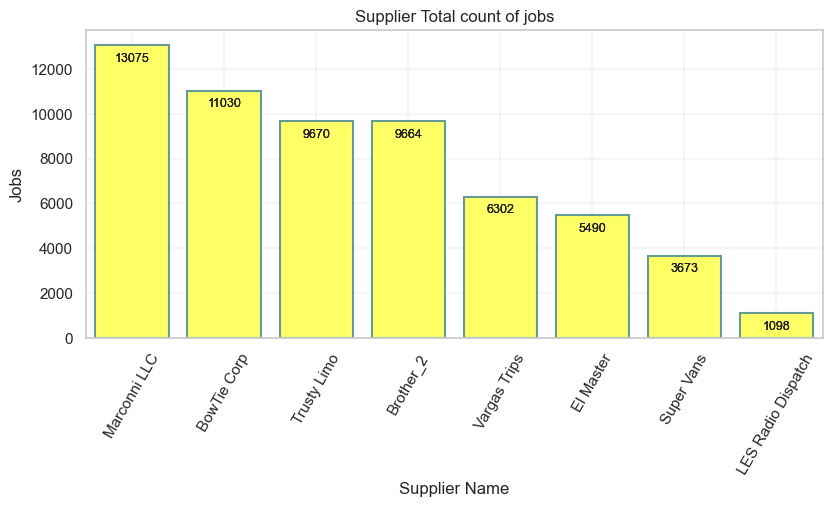

In [203]:
#1 What about starting with the volume of work for each supplier?

#DATA
group = book.groupby(book['supplier'])
g1=group.agg({'booking_id':['count']})
g1.columns=['count']
g1.reset_index(inplace=True)
g1.sort_values(by='count', ascending=False, inplace=True)
g1=g1[g1['count']>=100]
g1.reset_index(inplace=True)
print(g1)

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66']

ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['count'],  fill=True)
ax.bar(g1['supplier'],g1['count'],color=filledcolors)
ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['count'],  fill=False, color='#669b95')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)
ax.set_title('Supplier Total count of jobs')

ax.set(xlabel='Supplier Name', ylabel='Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=60)
#plt.show()



   index            supplier      mean  count
0      6        Marconni LLC  4.597354   4006
1      0         BowTie Corp  4.706941   3890
2      9         Trusty Limo  4.642026   3869
3      1           Brother_2  4.771689   3066
4      2           El Master  4.783093   2153
5     10        Vargas Trips  4.672302   2011
6      8          Super Vans  4.447095    964
7      5  LES Radio Dispatch  4.951923    104


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Marconni LLC'),
  Text(1, 0, 'BowTie Corp'),
  Text(2, 0, 'Trusty Limo'),
  Text(3, 0, 'Brother_2'),
  Text(4, 0, 'El Master'),
  Text(5, 0, 'Vargas Trips'),
  Text(6, 0, 'Super Vans'),
  Text(7, 0, 'LES Radio Dispatch')])

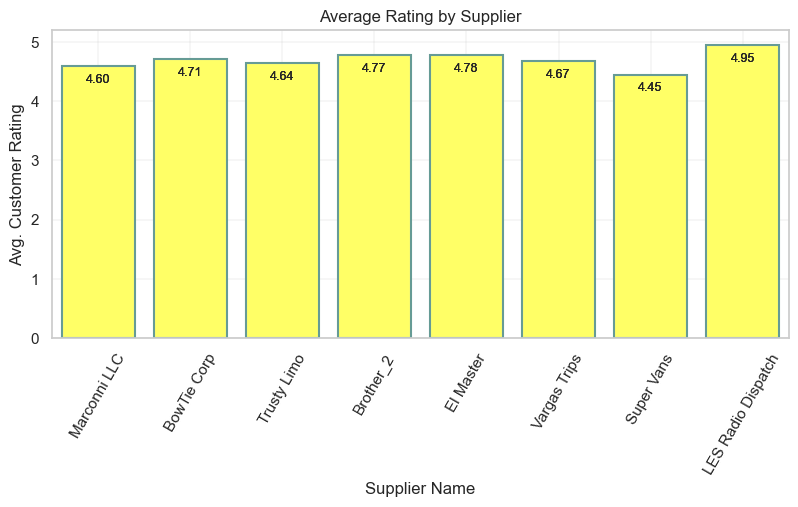

In [204]:
#12 What about the ratings for each?

#DATA
group = rb.groupby(rb['supplier'])
g1=group.agg({'rating_score':['mean','count']})
g1.columns=['mean','count']
g1.reset_index(inplace=True)
g1.sort_values(by='count', ascending=False, inplace=True)
g1=g1[g1['count']>=100]
g1.reset_index(inplace=True)
print(g1)

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66']

ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=True)
ax.bar(g1['supplier'],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=False, color='#669b95')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)

#months=['Aug','Dec','Apr','Sep','Oct','Jul','Mar','Nov','May','Jun','Jan','Feb'] #<-- This is improvable :( but for some reason it is not working intuitively.
#ax.set_xticks(range(0,12), labels=months)
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(0, 14000, 1000))
#ax.set_xlim(xmin=-1.5,xmax=7.5)

ax.set_title('Average Rating by Supplier')

ax.set(xlabel='Supplier Name', ylabel='Avg. Customer Rating')
plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=60)
#plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


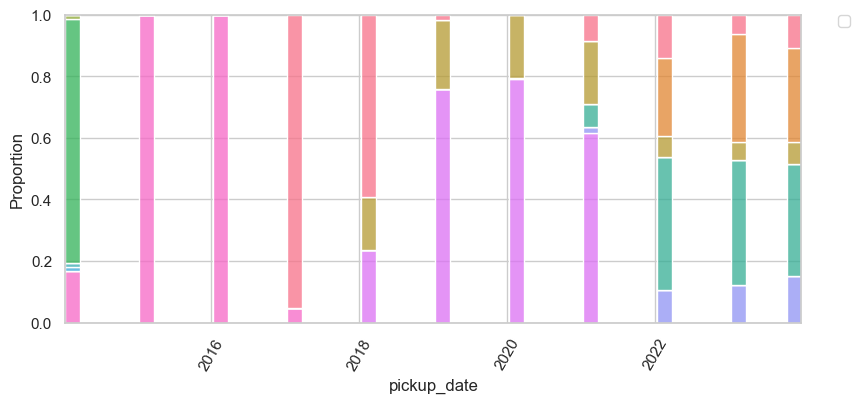

In [205]:
df_stacks=book[['pickup_date' , 'supplier','booking_id']]
df_stacks=df_stacks[~(df_stacks['supplier'].isna())]
df_stacks['pickup_date']=df_stacks['pickup_date'].dt.year.astype(int)
df_stacks=df_stacks[df_stacks['supplier'].isin(['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2'])]
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['booking_id']=1
df_stacks.dtypes

#['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2']
sns.histplot(
    data=df_stacks,
    x="pickup_date", hue="supplier",
    multiple="fill", stat="proportion",
    shrink=.8
)
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


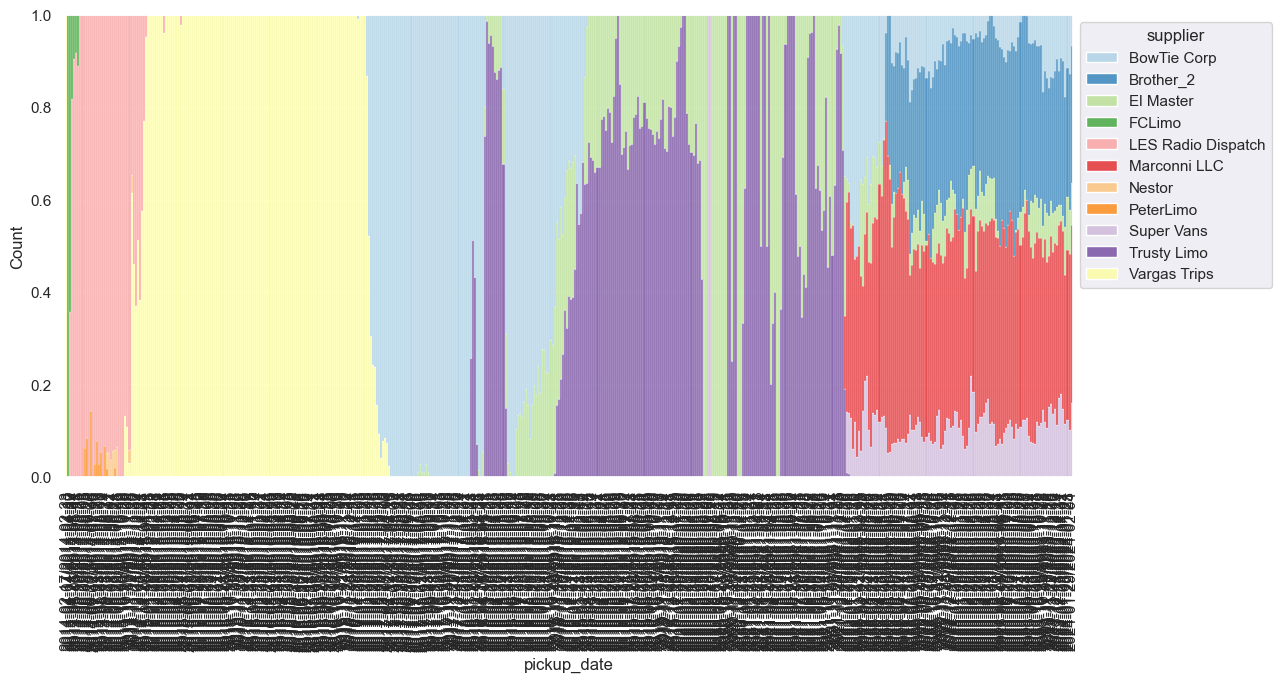

In [206]:
df_stacks=book[['pickup_date' , 'supplier','booking_id']]
df_stacks=df_stacks[~(df_stacks['supplier'].isna())]
df_stacks=df_stacks[df_stacks['pickup_date']<'2024-02-01']
df_stacks['pickup_date']=df_stacks['pickup_date'].dt.to_period('W').astype(str)
df_stacks=df_stacks[df_stacks['supplier'].isin(['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2'])]
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['booking_id']=1
df_stacks.sort_values(by='pickup_date' ,inplace=True)
#df_stacks.dtypes

#VISUALIZATION
width = 13
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=df_stacks,
    x="pickup_date", hue="supplier",
    multiple="fill", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    
    #shrink=.8
)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)


[Text(0.5, 0, 'Year - Quarter'), Text(0, 0.5, '% of Work')]

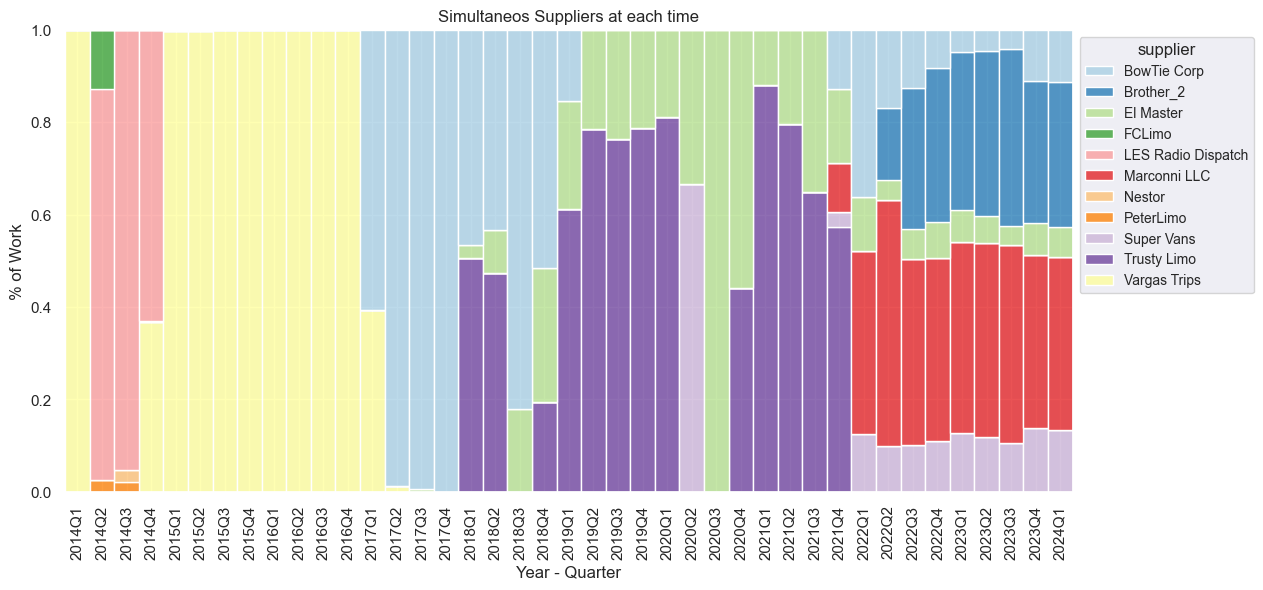

In [207]:
df_stacks=book[['pickup_date' , 'supplier','booking_id']]
df_stacks=df_stacks[~(df_stacks['supplier'].isna())]
df_stacks=df_stacks[df_stacks['pickup_date']<'2024-02-01']
df_stacks['pickup_date']=df_stacks['pickup_date'].dt.to_period('Q').astype(str)
df_stacks=df_stacks[df_stacks['supplier'].isin(['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2'])]
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['booking_id']=1
df_stacks.sort_values(by='pickup_date' ,inplace=True)
#df_stacks.dtypes

#VISUALIZATION
width = 13
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=df_stacks,
    x="pickup_date", hue="supplier",
    multiple="fill", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    
    #shrink=.8
)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)

ax.set_title('Simultaneos Suppliers at each time')
ax.set(xlabel='Year - Quarter', ylabel='''% of Work''')

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Van'),
  Text(1, 0, 'Sedan'),
  Text(2, 0, 'SUV6'),
  Text(3, 0, 'SUV4'),
  Text(4, 0, 'Limo')])

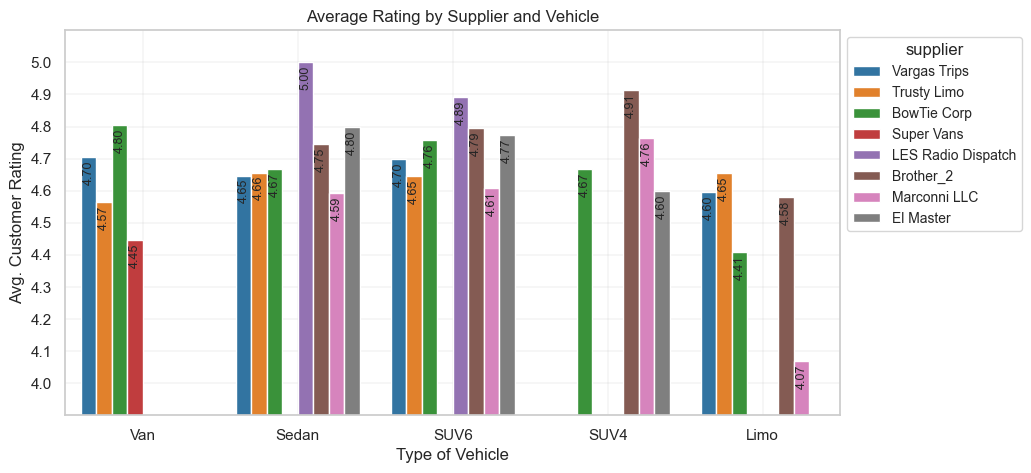

In [208]:
#DATA
group = rb.groupby([rb['supplier'],rb['vehicle_category']]) #[rb['pickup_date'].dt.year==2024]
g1=group.agg({'rating_score':['mean','count']})
g1.columns=['mean','count']
g1.reset_index(inplace=True)
g1.sort_values(by='vehicle_category', ascending=False, inplace=True)
g1=g1[g1['count']>=15]
g1
#g1.reset_index(inplace=True)
#print(g1)

width = 10
height = 5
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
#******************
ax=sns.barplot(data=g1, x='vehicle_category', y='mean' ,hue='supplier', dodge='True',palette=sns.color_palette("tab10", n_colors=8))
##*****************
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-20, fontsize=9, rotation=90 )
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=3.9 ,ymax=5.1)
ax.set(yticks=np.arange(4, 5.1, .1))
#ax.set_xlim(xmin=-1.5,xmax=7.5)

ax.set(title='Average Rating by Supplier and Vehicle')

ax.set(xlabel='Type of Vehicle', ylabel='Avg. Customer Rating')
#plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=0)

              supplier       mean  count
1            Brother_2  42.454931   9664
13          Super Vans  41.483924   3673
10        Marconni LLC  40.232493  13074
4            El Master  31.154153   5488
0          BowTie Corp  28.150345  11004
14         Trusty Limo  25.066136   9667
7    Golden Class Limo  23.521601     19
12           PeterLimo  23.493995     17
3               Efrain  21.802546      3
15        Vargas Trips  21.589643   6087
5               FCLimo  20.365243     20
2               Camila  19.041319      2
6             FRANKLYN  18.923611      1
9   LES Radio Dispatch  18.871108   1083
11              Nestor   8.950980     17
8          Johnny Limo   5.431597      2


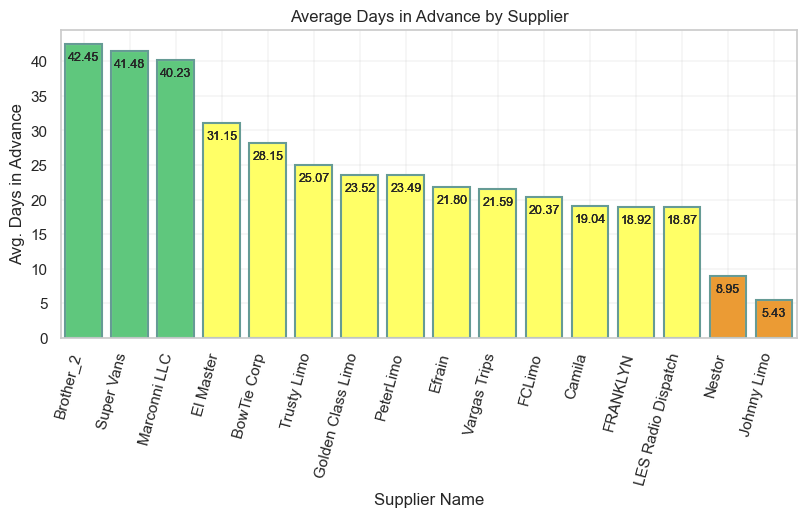

In [209]:
#12 What about the Days is advance for each Supplier?

#DATA
group = book.groupby(book['supplier'])
g1=group.agg({'days_in_advance':['mean','count']})
g1.columns=['mean','count']
g1.reset_index(inplace=True)
g1.sort_values(by='mean', ascending=False, inplace=True)
#g1=g1[g1['count']>=100]
print(g1)

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#5fc77d','#5fc77d','#5fc77d','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#eb9b34','#eb9b34']

ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=True)
ax.bar(g1['supplier'],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=False, color='#669b95')
plt.xticks(rotation=75,ha='right')
ax.set_title('Average Days in Advance by Supplier')
ax.set(xlabel='Supplier Name', ylabel='Avg. Days in Advance')
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)
plt.setp(ax.patches, linewidth=1.5 )

plt.show()



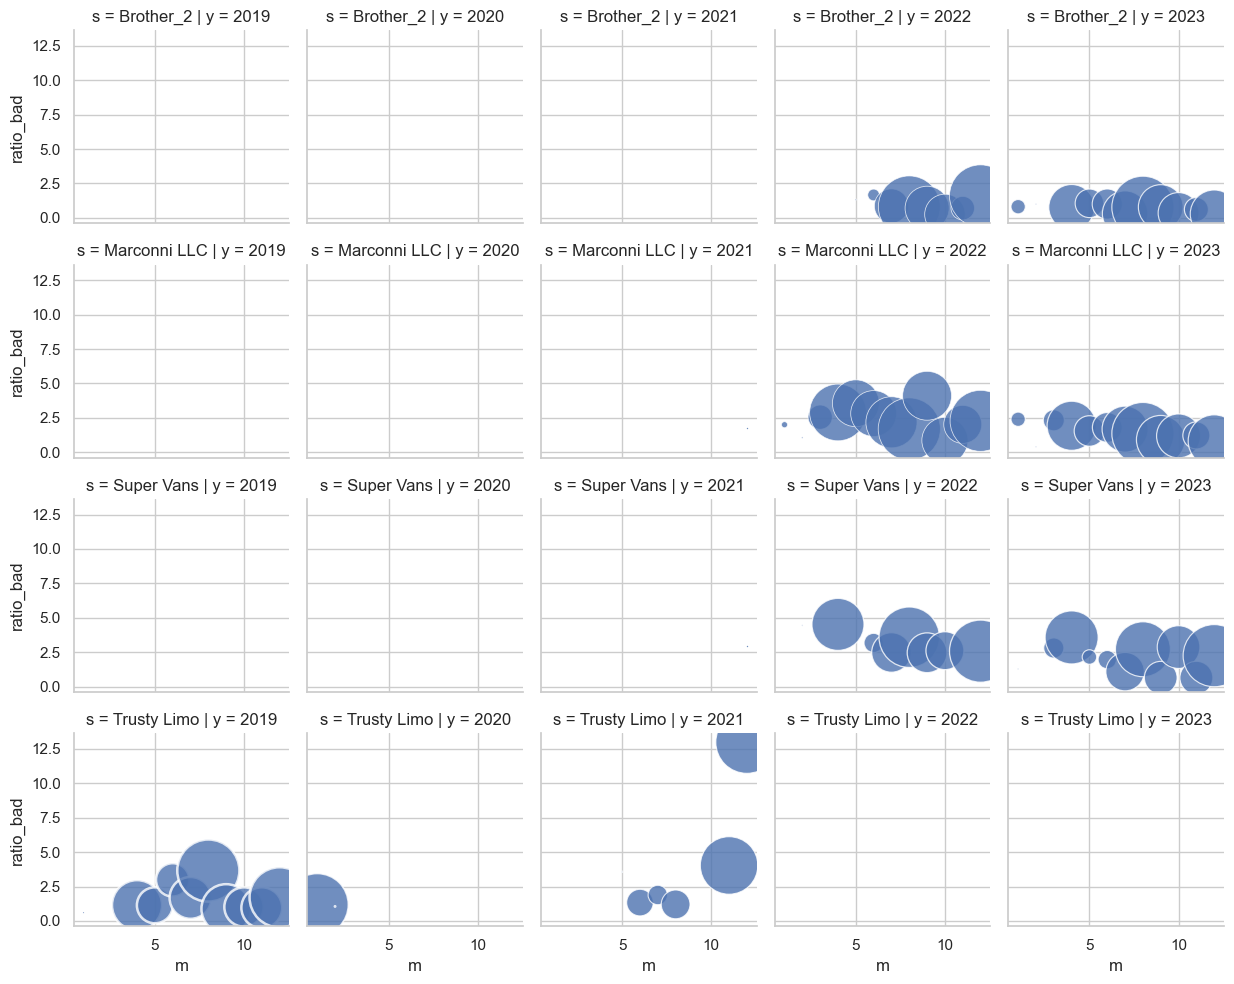

In [210]:

#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month,'supplier'])
g1=group.agg({'rating_score':['count', 'mean']})
g1.columns=['count_bad','mean']
g1.index.rename(['year','month','supplier'],inplace=True)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month','supplier'], ascending=True)
g1=g1[g1['year'].isin([2017,2018,2019,2020,2021,2022,2023])]
g1=g1[g1['supplier'].isin(['Super Vans','El Master','Trusty Limo','Marconni LLC', 'Brother_2'])]
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month,'supplier'])
g2=group.agg({'booking_id':['count']})
g2.columns=['count_total']
g2.index.rename(['year','month','supplier'],inplace=True)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month','supplier'], ascending=True)
g2=g2[g2['year'].isin([2017,2018,2019,2020,2021,2022,2023])]
g2=g2[g2['supplier'].isin(['Super Vans','El Master','Trusty Limo','Marconni LLC', 'Brother_2'])]

g3=pd.merge(g1,g2,how='left',left_on=['year','month','supplier'],right_on=['year','month','supplier'])
g3['ratio_bad']=(g3['count_bad']/g3['count_total'])*100
#g3=g3.sort_values(by=['year','month', 'supplier'], ascending=True)



#g3=g3[g3['supplier'].isin(['BowTie Corp','El Master','Trusty Limo','Marconni LLC', 'Brother_2', 'Super Vans'])]
g3=g3[g3['supplier'].isin(['Super Vans','Trusty Limo','Marconni LLC', 'Brother_2'])]
g3=g3[g3['year'].isin([2019,2020,2021,2022,2023])]
#g3['month']=g3['month'].astype('category')
g3['year']=g3['year'].astype('category')
g3['supplier']=g3['supplier'].astype('category')
#g3.sort_values(by='count_total', ascending=True)
g3.columns=['y','m','s','count_bad','mean','count_total','ratio_bad']
g3.dtypes
g3

fg= sns.FacetGrid(data=g3, col='y', row='s', height=2.5, aspect=1)
#fg.map(sns.relplot(data=g3, x="month", y="ratio_bad", size="count_total"))#, sizes=(0, 1000), alpha=.9)#, palette="Dark2")) #, height=height, aspect=(width/height)
#fg.map_dataframe(sns.relplot(data=g3, x="month", y="ratio_bad", size="count_total"))
fg.map_dataframe(sns.scatterplot, x="m", y="ratio_bad", size="count_total",sizes=(1, 2000), alpha=0.8)
#fg.map(plt.scatter, "month", 'ratio_bad')
#fg.map(sns.barplot, 'month', 'ratio_bad')#, size=g3['count_total'], sizes=(0,2000))
#fg.set(yticks=[], xlabel="Rating", ylabel="Percentage")
